In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import date

In [46]:
df = pd.read_csv('takehome_user_engagement.csv',parse_dates=['time_stamp'])
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [48]:
df_3 = df.groupby('user_id').count()
df_3.head()

,time_stamp,visited
user_id,,
1,1,1
2,14,14
3,1,1
4,1,1
5,1,1


In [49]:
user_id=df_3[df_3.visited>2].index.values

In [50]:
df_users = df[df.user_id.isin(user_id)]

In [51]:
df_users.sort_values(["user_id", "time_stamp"], ascending = (True, True), inplace = True)

C:\Users\a_raf\Anaconda3\envs\Springboard\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_users

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
...,...,...,...
207905,2014-04-20 14:22:45,11991,1
207906,2014-04-25 14:22:45,11991,1
207907,2014-04-28 14:22:45,11991,1
207908,2014-05-17 14:22:45,11991,1


In [53]:
df_users['next_time_stamp']= df_users.time_stamp.values
df_users['next_id'] =df_users.user_id.values
df_users['delta_day']=0

C:\Users\a_raf\Anaconda3\envs\Springboard\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\a_raf\Anaconda3\envs\Springboard\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\a_raf\Anaconda3\envs\Springboard\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [56]:
df_users.next_time_stamp[:-2]=df_users.time_stamp[2:]
df_users.next_id[:-2]=df_users.user_id[2:]
df_users.delta_day=(df_users.next_time_stamp-df_users.time_stamp)

C:\Users\a_raf\Anaconda3\envs\Springboard\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\a_raf\Anaconda3\envs\Springboard\lib\site-packages\pandas\core\series.py:1042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
C:\Users\a_raf\Anaconda3\envs\Springboard\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

AttributeError: 'Series' object has no attribute 'days'

In [55]:
df_users

,time_stamp,user_id,visited,next_time_stamp,next_id,delta_day
1,2013-11-15 03:45:04,2,1,2013-12-09 03:45:04,2,24 days
2,2013-11-29 03:45:04,2,1,2013-12-25 03:45:04,2,26 days
3,2013-12-09 03:45:04,2,1,2013-12-31 03:45:04,2,22 days
4,2013-12-25 03:45:04,2,1,2014-01-08 03:45:04,2,14 days
5,2013-12-31 03:45:04,2,1,2014-02-03 03:45:04,2,34 days
...,...,...,...,...,...,...
207905,2014-04-20 14:22:45,11991,1,2014-04-28 14:22:45,11991,8 days
207906,2014-04-25 14:22:45,11991,1,2014-05-17 14:22:45,11991,22 days
207907,2014-04-28 14:22:45,11991,1,2014-05-30 14:22:45,11991,32 days
207908,2014-05-17 14:22:45,11991,1,2014-05-17 14:22:45,11991,0 days


In [60]:
df_users.delta_day=df_users.delta_day.values/np.timedelta64(1, 'D')

C:\Users\a_raf\Anaconda3\envs\Springboard\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
df_users

,time_stamp,user_id,visited,next_time_stamp,next_id,delta_day
1,2013-11-15 03:45:04,2,1,2013-12-09 03:45:04,2,24.0
2,2013-11-29 03:45:04,2,1,2013-12-25 03:45:04,2,26.0
3,2013-12-09 03:45:04,2,1,2013-12-31 03:45:04,2,22.0
4,2013-12-25 03:45:04,2,1,2014-01-08 03:45:04,2,14.0
5,2013-12-31 03:45:04,2,1,2014-02-03 03:45:04,2,34.0
...,...,...,...,...,...,...
207905,2014-04-20 14:22:45,11991,1,2014-04-28 14:22:45,11991,8.0
207906,2014-04-25 14:22:45,11991,1,2014-05-17 14:22:45,11991,22.0
207907,2014-04-28 14:22:45,11991,1,2014-05-30 14:22:45,11991,32.0
207908,2014-05-17 14:22:45,11991,1,2014-05-17 14:22:45,11991,0.0


In [75]:
df_users_final=df_users[(df_users.user_id==df_users.next_id) & (df_users.delta_day<8)]

In [77]:
df_users_final.user_id.nunique()

1657

In [78]:
users = list(set(df_users_final.user_id))

In [79]:
df = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
#Create column for whether user is an adopted user
df['adopted_user'] = df.object_id.isin(users)
df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,False
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,False
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


In [81]:
#Fill in 0 for users who weren't invited
df['invited_by_user_id'].fillna(0, inplace=True)

#Replace null values with earliest session login time
df['last_session_creation_time'].fillna(min(df['last_session_creation_time']), inplace=True)

In [101]:
def categorical_bar_graph(df, column_name):
    
    cross_tab = pd.crosstab(df[column_name], df['adopted_user'])

    num_categories = len(cross_tab.index)
    x_vals = np.arange(num_categories)
    x_labels = cross_tab.index.values

    y_vals = np.empty(num_categories)
    for i in range(num_categories):
        y_vals[i] = cross_tab.iloc[i,1] / np.sum(cross_tab.iloc[i,0:2])
        
    return x_labels, x_vals, y_vals

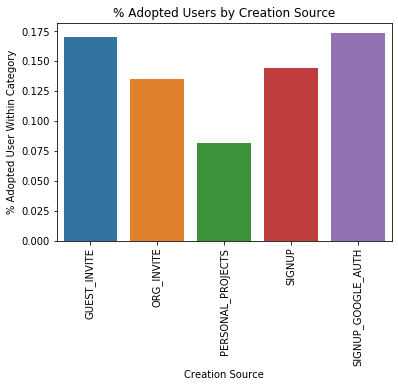

In [103]:
#Create bar graph for creation sources
x_labels, x, y = categorical_bar_graph(df, 'creation_source')

sn.barplot(x,y)
plt.title('% Adopted Users by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('% Adopted User Within Category')
plt.xticks(x, x_labels, rotation=90)
plt.show()

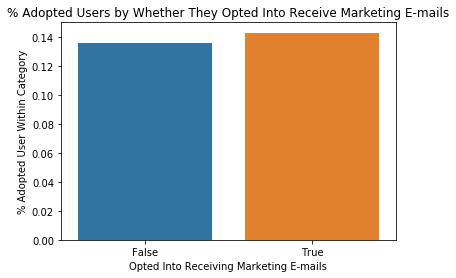

In [105]:
#Create bar graph for whether a user opted into mailing list
_, x, y = categorical_bar_graph(df, 'opted_in_to_mailing_list')

sn.barplot(x,y)
plt.title('% Adopted Users by Whether They Opted Into Receive Marketing E-mails')
plt.xlabel('Opted Into Receiving Marketing E-mails')
plt.ylabel('% Adopted User Within Category')
plt.xticks(x, [False, True])
plt.show()


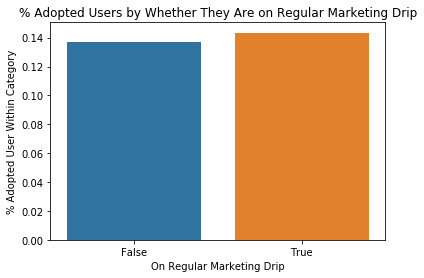

In [106]:
#Create bar graph for whether user is on regular marketing email drip
_, x, y = categorical_bar_graph(df, 'enabled_for_marketing_drip')

sn.barplot(x, y)
plt.title('% Adopted Users by Whether They Are on Regular Marketing Drip')
plt.xlabel('On Regular Marketing Drip')
plt.ylabel('% Adopted User Within Category')
plt.xticks(x, [False, True])
plt.show()

In [107]:
#Transform creation time to days since first creation day
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['creation_time_delta'] = (df['creation_time'] - df['creation_time'].min())  / np.timedelta64(1,'D')

In [108]:
log_columns = ['creation_time_delta', 'last_session_creation_time', 'opted_in_to_mailing_list', 
               'enabled_for_marketing_drip']

dfx = df.loc[:, log_columns]

dummy_creation_source = pd.get_dummies(df['creation_source'], drop_first=True)
dfx = pd.concat([dfx, dummy_creation_source], axis=1)

In [109]:
import sys
!{sys.executable} -m pip install statsmodels

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = dfx.astype(float)
y = df.adopted_user


clf = LogisticRegression()
# Fit the model on the data.
clf.fit(X, y)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X), y))

0.8619166666666667


In order to see the effect of our variables on the percentage of people who are considered as adopted users I created a bunch of graphs. What I found was that some of the categories of creation source, particularly if the user was invited to join another user's workspace, were associated with differences in percentage of adopted users. In contrast, whether users opted into receiving marketing e-mails or whether they were on the regular marketing e-mail drip seemed to have no effect on user adoption. 